This case requires to develop a model for predicting fraudulent transactions for a financial company. Data for the case is available in CSV format having 63,62,620 rows and 10 columns.

Data Dictionary:
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

*type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

*amount - amount of the transaction in local currency.

*nameOrig - customer who started the transaction

*oldbalanceOrg - initial balance before the transaction

*newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

*isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents 
aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

*isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. 
An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
%matplotlib inline 

In [44]:
# Reading the data from CSV file
data = pd.read_csv("Fraud.csv", sep=",")

# To show the first 5 rows of the dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [45]:
# To show the last 5 rows of the dataset
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [46]:
# To get an additional information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [47]:
# To know the dimensions of dataset
data.shape

(6362620, 11)

In [48]:
# Dropping unnecessary column
data = data.drop(['step'],axis = 1)
data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [49]:
# Excluding 'payment' type of data since there is no fraud here
data = data[data.type != 'PAYMENT']
data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
9,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [50]:
# Excluding 'cash_in' type of data since there is no fraud here
data = data[data.type != 'CASH_IN']
data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
9,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
10,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [52]:
# To know the dimensions of data after processing the data
data.shape

(2811841, 10)

In [53]:
# Checking for null values
data.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [54]:
# Checking for duplicate values
data.duplicated().sum()

0

In [55]:
# To know the statistical information about dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,2811841.0,3.129381e+05,8.820279e+05,0.0,79325.07,168326.66,303831.20,9.244552e+07
oldbalanceOrg,2811841.0,4.795257e+04,2.500449e+05,0.0,0.00,393.00,31239.00,5.958504e+07
newbalanceOrig,2811841.0,1.681494e+04,1.511800e+05,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,2811841.0,1.700451e+06,4.228049e+06,0.0,128131.92,553553.94,1730656.03,3.560159e+08
newbalanceDest,2811841.0,2.041826e+06,4.673415e+06,0.0,323591.17,821885.50,2112134.44,3.561793e+08
isFraud,2811841.0,2.920862e-03,5.396602e-02,0.0,0.00,0.00,0.00,1.000000e+00
isFlaggedFraud,2811841.0,5.690222e-06,2.385412e-03,0.0,0.00,0.00,0.00,1.000000e+00


In [56]:
# Dropping unnecessary columns
data = data.drop(['type','nameOrig','nameDest'],axis = 1)
data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,1,0
9,5337.77,41720.00,36382.23,41898.00,40348.79,0,0
10,9644.94,4465.00,0.00,10845.00,157982.12,0,0
15,229133.94,15325.00,0.00,5083.00,51513.44,0,0
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


In [57]:
# To check the total count of data which is flagged as fraudulent
data['isFlaggedFraud'].value_counts()

0    2811825
1         16
Name: isFlaggedFraud, dtype: int64

In [58]:
# To check the total count of fraudulent and genuine transactions
data['isFraud'].value_counts()

0    2803628
1       8213
Name: isFraud, dtype: int64

It is observed that this data is highly imbalanced.

0 ---> Normal Transaction , 
1 ---> Fraudulent Transaction

In [62]:
# Separating genuine and fraudulent data since the data is highly imbalanced
genuine = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [63]:
# Getting statistical measures of genuine data
genuine.amount.describe()

count    2.803628e+06
mean     3.095545e+05
std      8.714364e+05
min      1.000000e-02
25%      7.925903e+04
50%      1.680957e+05
75%      3.030607e+05
max      9.244552e+07
Name: amount, dtype: float64

In [64]:
# Getting statistical measures of fraudulent data
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [65]:
# To get the dimensions of genuine and fraudulent data
print(genuine.shape)
print(fraud.shape)

(2803628, 7)
(8213, 7)


In [66]:
# Compare the mean values for both the transactions
data.groupby('isFraud').mean()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,
0,3.095545e+05,4.326048e+04,16300.598520,1.703838e+06,2.044058e+06,0.000000
1,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [67]:
# Applying undersampling
# Create a sample set from genuine transaction taking no of transactions = 8213 
genuine_sample = genuine.sample(n = 8213)

In [68]:
# Concatenate 'genuine_sample' with 'fraud' transaction
df = pd.concat([genuine_sample , fraud], axis = 0) 
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1326727,161908.65,20403.0,0.0,1136206.37,1566164.03,0,0
4844810,149693.89,10964.0,0.0,512997.15,662691.04,0,0
4210448,278375.36,34973.0,0.0,0.00,278375.36,0,0
3620185,53466.37,0.0,0.0,3531961.17,3585427.54,0,0
1598197,31573.23,0.0,0.0,404727.24,436300.47,0,0


In [69]:
df.tail()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [70]:
# The data is uniformly distributed
df['isFraud'].value_counts() 

0    8213
1    8213
Name: isFraud, dtype: int64

In [71]:
# Compare the values of both the transactions for new dataset 
# It is observed that the nature of data has not changed much.
# There are minor difference between 2 datasets of 'isFraud'.

df.groupby('isFraud').mean()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,
0,3.143556e+05,4.197592e+04,15175.744772,1.759422e+06,2.099939e+06,0.000000
1,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


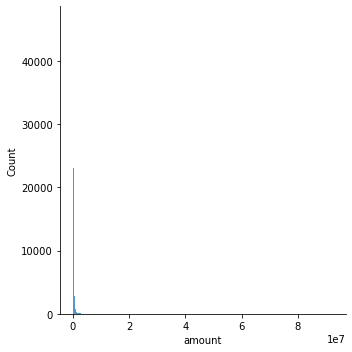

In [72]:
# Data Visualization for the original dataset
sns.displot(data['amount'])
plt.show()

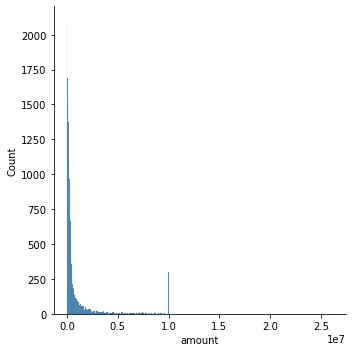

In [73]:
# Data Visualization for the new dataset
sns.displot(df['amount'])
plt.show()

From the above amount distribution curves of both the datasets, it is observed that the number of high amount transactions is very low. So there is a high probability for huge transactions to be fraudulent.

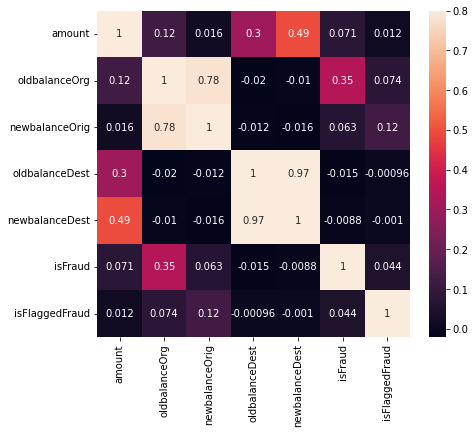

In [74]:
# Creating correlation matrix for the original dataset
correlation_matrix = data.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, vmax = 0.8, annot = True)
plt.show()

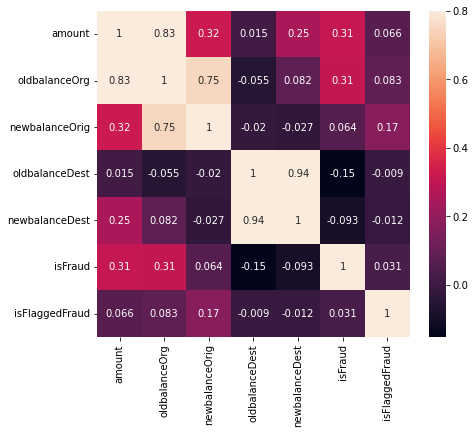

In [76]:
# Creating correlation matrix for the new dataset
correlation_matrix = df.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, vmax = 0.8, annot = True)
plt.show()

In [77]:
# Dropping 'oldbalanceDest' feature since it is highly correlated.
df = df.drop(['oldbalanceDest'],axis = 1)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
1326727,161908.65,20403.0,0.0,1566164.03,0,0
4844810,149693.89,10964.0,0.0,662691.04,0,0
4210448,278375.36,34973.0,0.0,278375.36,0,0
3620185,53466.37,0.0,0.0,3585427.54,0,0
1598197,31573.23,0.0,0.0,436300.47,0,0


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


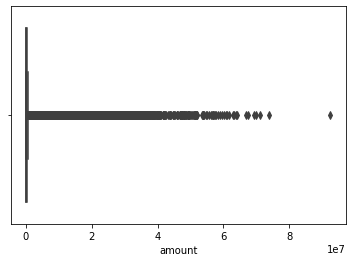

In [78]:
# Outlier detection for the original dataset
sns.boxplot(data['amount'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


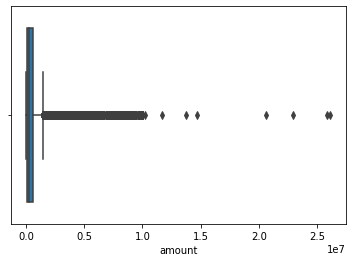

In [79]:
# Outlier detection for the new dataset
sns.boxplot(df['amount'])
plt.show()

In [80]:
# Splitting of dataset into test set and train set
x = df.drop(['isFraud'],axis = 1)
y = df['isFraud']
xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [81]:
print(x.shape , xtrain.shape, xtest.shape)

(16426, 5) (13140, 5) (3286, 5)


In [82]:
# Training the model using logistic regression
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)
y_pred = logistic.predict(xtest)
print(y_pred)

[1 1 1 ... 1 0 1]


In [83]:
# Creating confusion matrix
cm = metrics.confusion_matrix(y_pred, ytest)
print(cm)

[[1427   57]
 [ 203 1599]]


In [84]:
# Using F1 score
score = f1_score(ytest, y_pred, average=None)
print("F1 score is:", score*100)

F1 score is: [91.65061015 92.48120301]


In [85]:
# Calculating accuracy on training data
accuracy = logistic.score(xtrain,ytrain)
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  91.80365296803653 %


In [86]:
# Calculating accuracy on testing data
accuracy = logistic.score(xtest,ytest)
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  92.08764455264759 %
